In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

raw_path = "../data/raw/ga_sessions_20170801.csv"
df = pd.read_csv(raw_path)

print(" Data loaded")
print(df.shape)
df.head()


 Data loaded
(2556, 16)


,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,NaN,1,1501591568,1501591568,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'South...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 5, 'minut...",3418334011779872055,NaN,NaN,Organic Search,Not Socially Engaged
1,NaN,2,1501589647,1501589647,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...","[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 5, 'minut...",2474397855041322408,NaN,NaN,Referral,Not Socially Engaged
2,NaN,1,1501616621,1501616621,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'North...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",5870462820713110108,NaN,NaN,Referral,Not Socially Engaged
3,NaN,1,1501601200,1501601200,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 8, 'minut...",9397809171349480379,NaN,NaN,Referral,Not Socially Engaged
4,NaN,1,1501615525,1501615525,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6089902943184578335,NaN,NaN,Referral,Not Socially Engaged


In [2]:
# Info and summary
df.info()

# Missing values
df.isnull().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   visitorId             0 non-null      float64
 1   visitNumber           2556 non-null   int64  
 2   visitId               2556 non-null   int64  
 3   visitStartTime        2556 non-null   int64  
 4   date                  2556 non-null   int64  
 5   totals                2556 non-null   object 
 6   trafficSource         2556 non-null   object 
 7   device                2556 non-null   object 
 8   geoNetwork            2556 non-null   object 
 9   customDimensions      2556 non-null   object 
 10  hits                  2556 non-null   object 
 11  fullVisitorId         2556 non-null   uint64 
 12  userId                0 non-null      float64
 13  clientId              0 non-null      float64
 14  channelGrouping       2556 non-null   object 
 15  socialEngagementType 

visitorId               2556
clientId                2556
userId                  2556
visitNumber                0
date                       0
totals                     0
visitId                    0
visitStartTime             0
device                     0
trafficSource              0
geoNetwork                 0
customDimensions           0
fullVisitorId              0
hits                       0
channelGrouping            0
socialEngagementType       0
dtype: int64

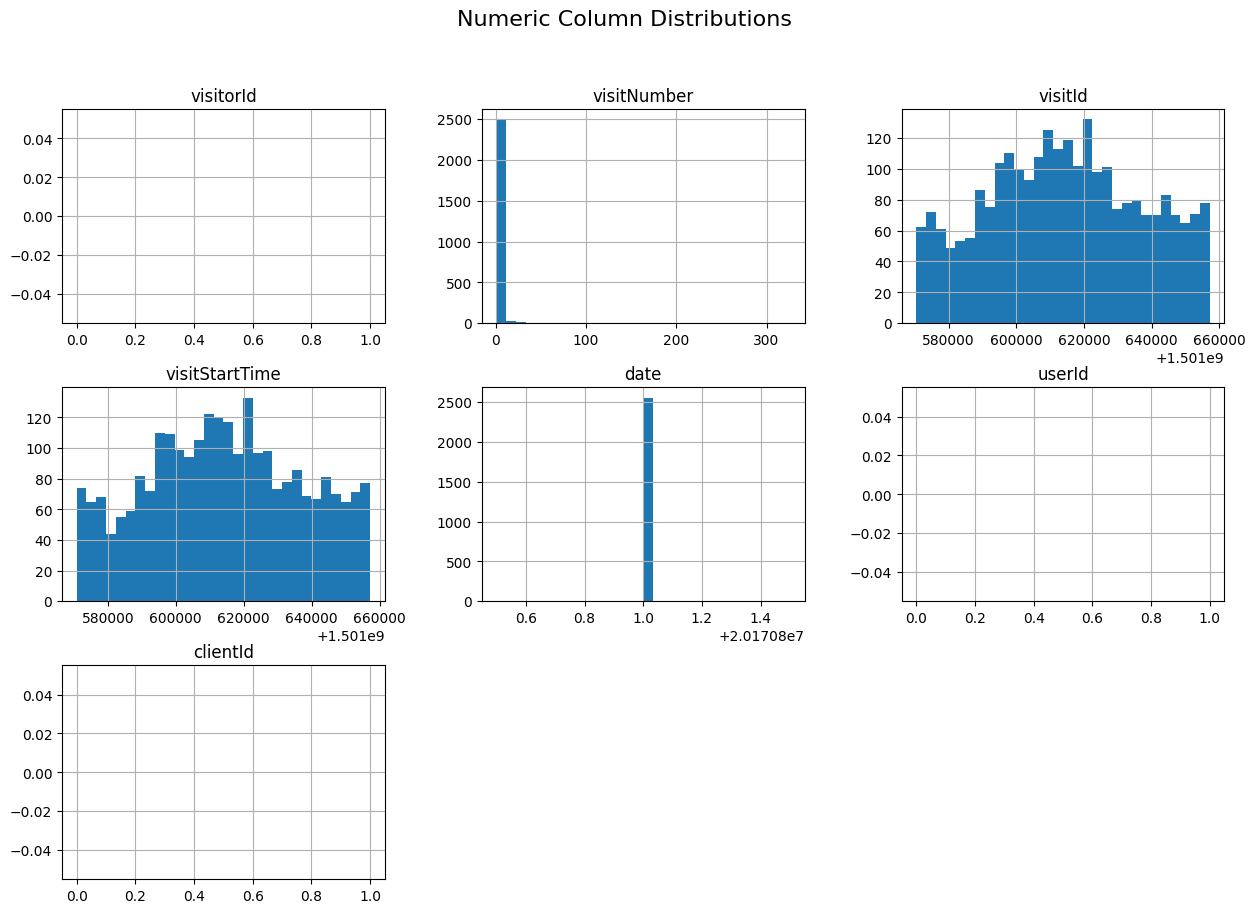

In [3]:
# Select numeric columns for histograms
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[num_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Numeric Column Distributions", fontsize=16)
plt.show()


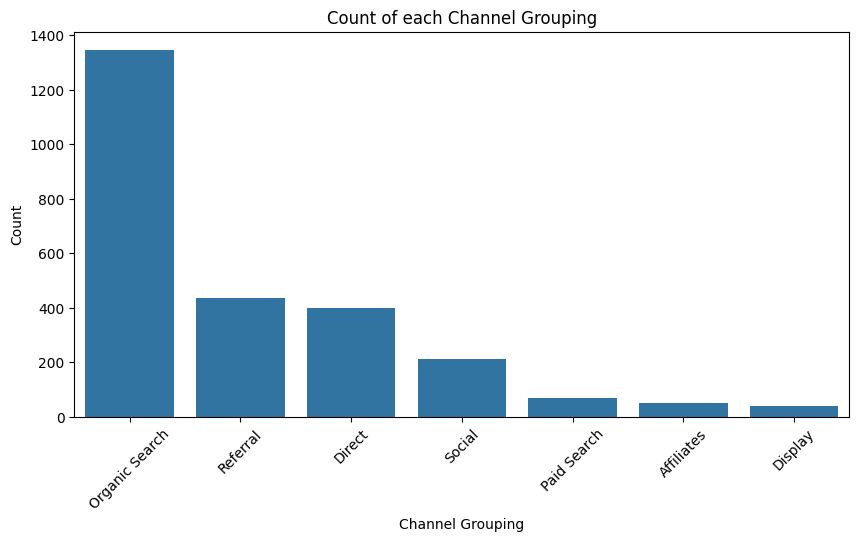

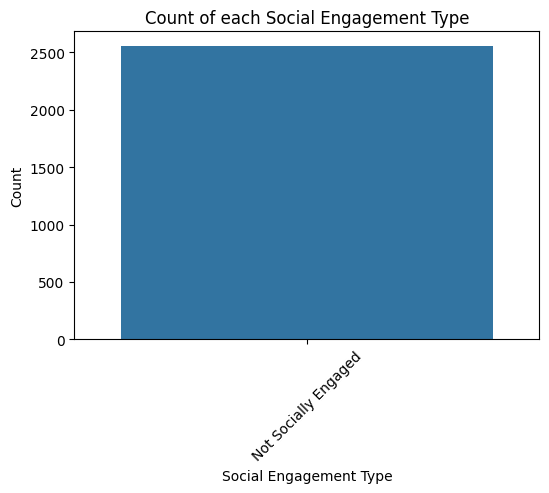

In [4]:
# Countplot for channelGrouping
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='channelGrouping', order=df['channelGrouping'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of each Channel Grouping")
plt.xlabel("Channel Grouping")
plt.ylabel("Count")
plt.show()

# Countplot for socialEngagementType
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='socialEngagementType', order=df['socialEngagementType'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of each Social Engagement Type")
plt.xlabel("Social Engagement Type")
plt.ylabel("Count")
plt.show()


In [5]:
cols = ['totals', 'trafficSource', 'device', 'geoNetwork', 'customDimensions', 'hits']

for col in cols:
    print(f"--- {col} ---")
    print(df[col].nunique())           # number of unique values
    

--- totals ---
1083
--- trafficSource ---
177
--- device ---
39
--- geoNetwork ---
830
--- customDimensions ---
6
--- hits ---
2536


In [6]:
df['totals'].unique()

array(["{'visits': 1, 'hits': 1, 'pageviews': 1, 'timeOnSite': None, 'bounces': 1, 'transactions': None, 'transactionRevenue': None, 'newVisits': 1, 'screenviews': None, 'uniqueScreenviews': None, 'timeOnScreen': None, 'totalTransactionRevenue': None, 'sessionQualityDim': 1}",
       "{'visits': 1, 'hits': 1, 'pageviews': 1, 'timeOnSite': None, 'bounces': 1, 'transactions': None, 'transactionRevenue': None, 'newVisits': None, 'screenviews': None, 'uniqueScreenviews': None, 'timeOnScreen': None, 'totalTransactionRevenue': None, 'sessionQualityDim': 1}",
       "{'visits': 1, 'hits': 1, 'pageviews': 1, 'timeOnSite': None, 'bounces': 1, 'transactions': None, 'transactionRevenue': None, 'newVisits': None, 'screenviews': None, 'uniqueScreenviews': None, 'timeOnScreen': None, 'totalTransactionRevenue': None, 'sessionQualityDim': 2}",
       ...,
       "{'visits': 1, 'hits': 140, 'pageviews': 93, 'timeOnSite': 2493, 'bounces': None, 'transactions': None, 'transactionRevenue': None, 'newVisit

In [7]:
import ast

# Convert the stringified dicts into real dicts
df['totals_dict'] = df['totals'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else {})


In [8]:
totals_expanded = pd.json_normalize(df['totals_dict'])

# Add prefix to avoid confusion
totals_expanded = totals_expanded.add_prefix("totals_")

# Merge back into original df
df = df.join(totals_expanded)

df.head()


,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,...,totals_timeOnSite,totals_bounces,totals_transactions,totals_transactionRevenue,totals_newVisits,totals_screenviews,totals_uniqueScreenviews,totals_timeOnScreen,totals_totalTransactionRevenue,totals_sessionQualityDim
0,NaN,1,1501591568,1501591568,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'South...",[],...,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1
1,NaN,2,1501589647,1501589647,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...","[{'index': 4, 'value': 'APAC'}]",...,NaN,1.0,NaN,NaN,NaN,None,None,None,NaN,1
2,NaN,1,1501616621,1501616621,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'North...","[{'index': 4, 'value': 'EMEA'}]",...,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1
3,NaN,1,1501601200,1501601200,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]",...,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1
4,NaN,1,1501615525,1501615525,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]",...,NaN,1.0,NaN,NaN,1.0,None,None,None,NaN,1


In [11]:
import json

def safe_json_loads(x):
    """Safely parse stringified dicts/JSON objects."""
    if pd.isna(x):
        return {}
    try:
        return json.loads(x.replace("None", "null")
                            .replace("True", "true")
                            .replace("False", "false"))
    except Exception:
        return {}

def flatten_json_column(df, col_name):
    """
    Flattens a JSON/dict-like string column into separate dataframe columns.
    """
    df[f"{col_name}_dict"] = df[col_name].apply(safe_json_loads)

    expanded = pd.json_normalize(df[f"{col_name}_dict"])
    expanded = expanded.add_prefix(f"{col_name}_")

    df = df.join(expanded)
    return df


In [12]:
df = flatten_json_column(df, "trafficSource")
df = flatten_json_column(df, "device")
df = flatten_json_column(df, "geoNetwork")
df = flatten_json_column(df, "customDimensions")
df = flatten_json_column(df, "hits")



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 85 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   visitorId                                                        0 non-null      float64
 1   visitNumber                                                      2556 non-null   int64  
 2   visitId                                                          2556 non-null   int64  
 3   visitStartTime                                                   2556 non-null   int64  
 4   date                                                             2556 non-null   int64  
 5   totals                                                           2556 non-null   object 
 6   trafficSource                                                    2556 non-null   object 
 7   device                                    

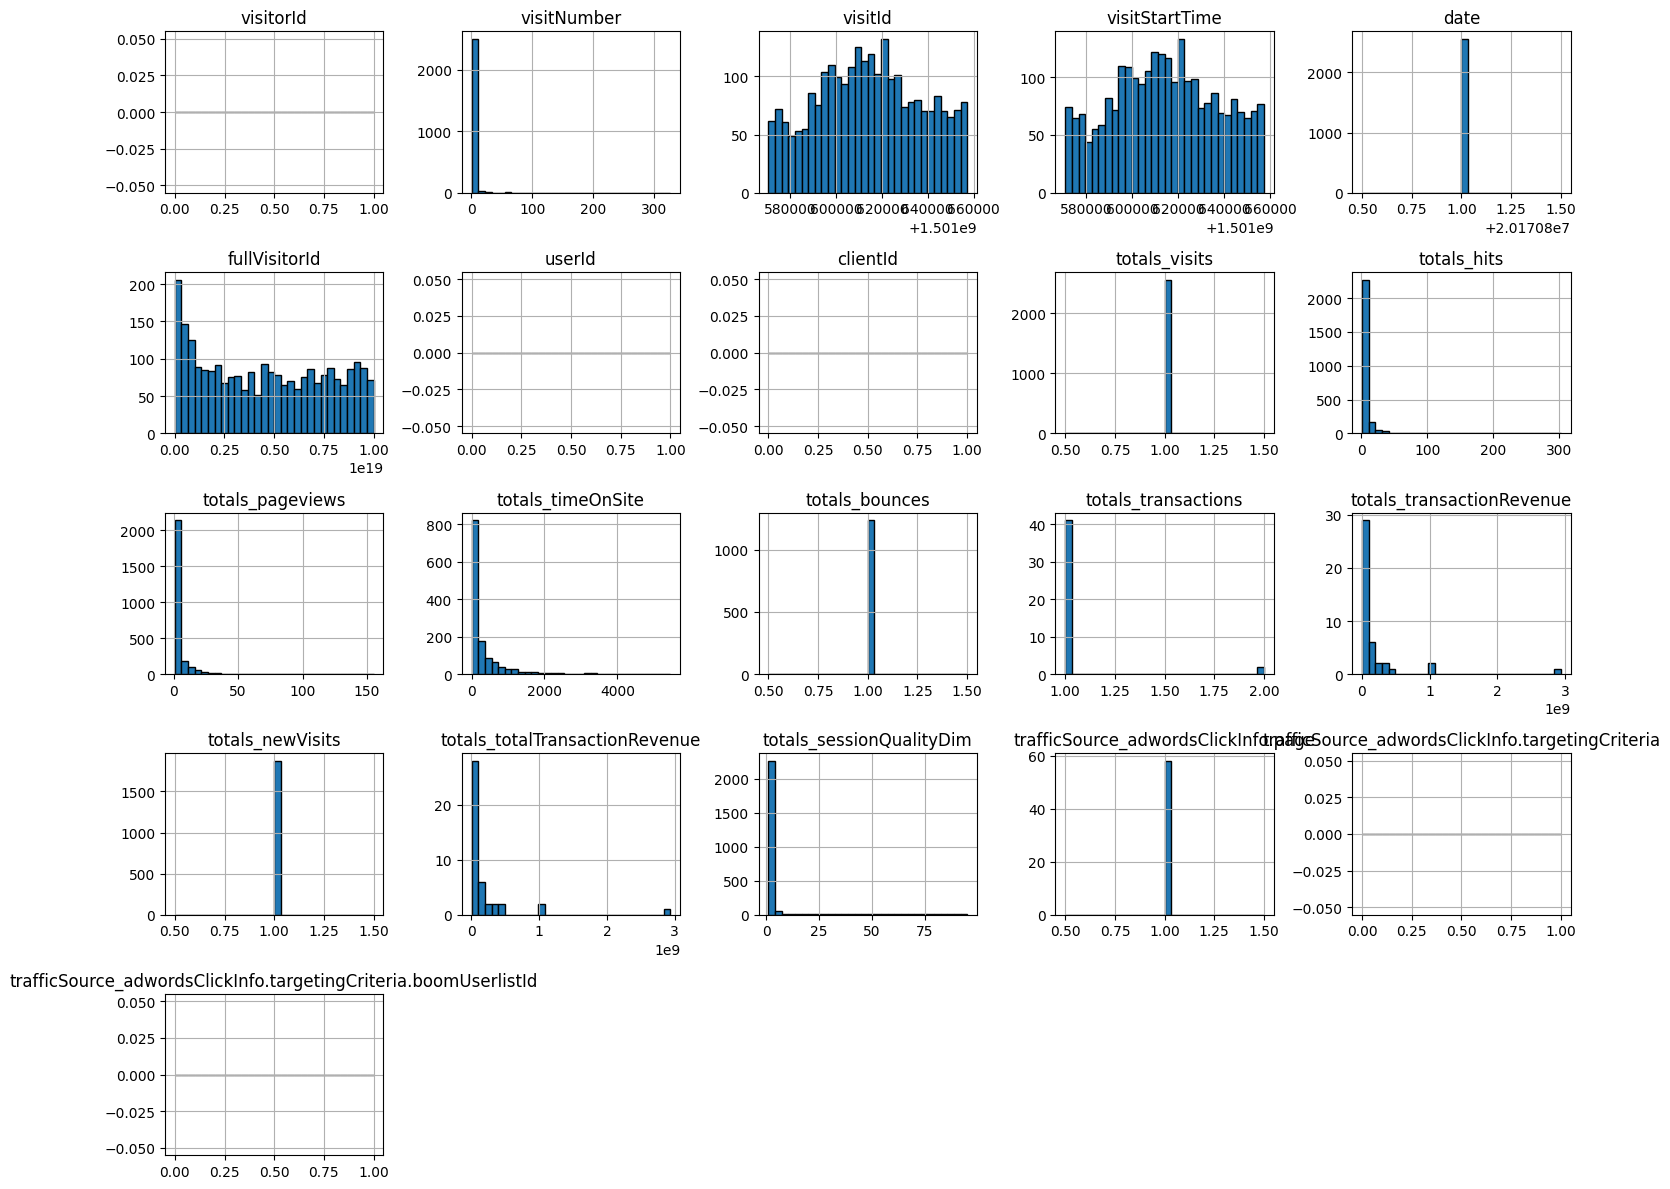

In [14]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=["int64","float64","uint64"]).columns

df[num_cols].hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()


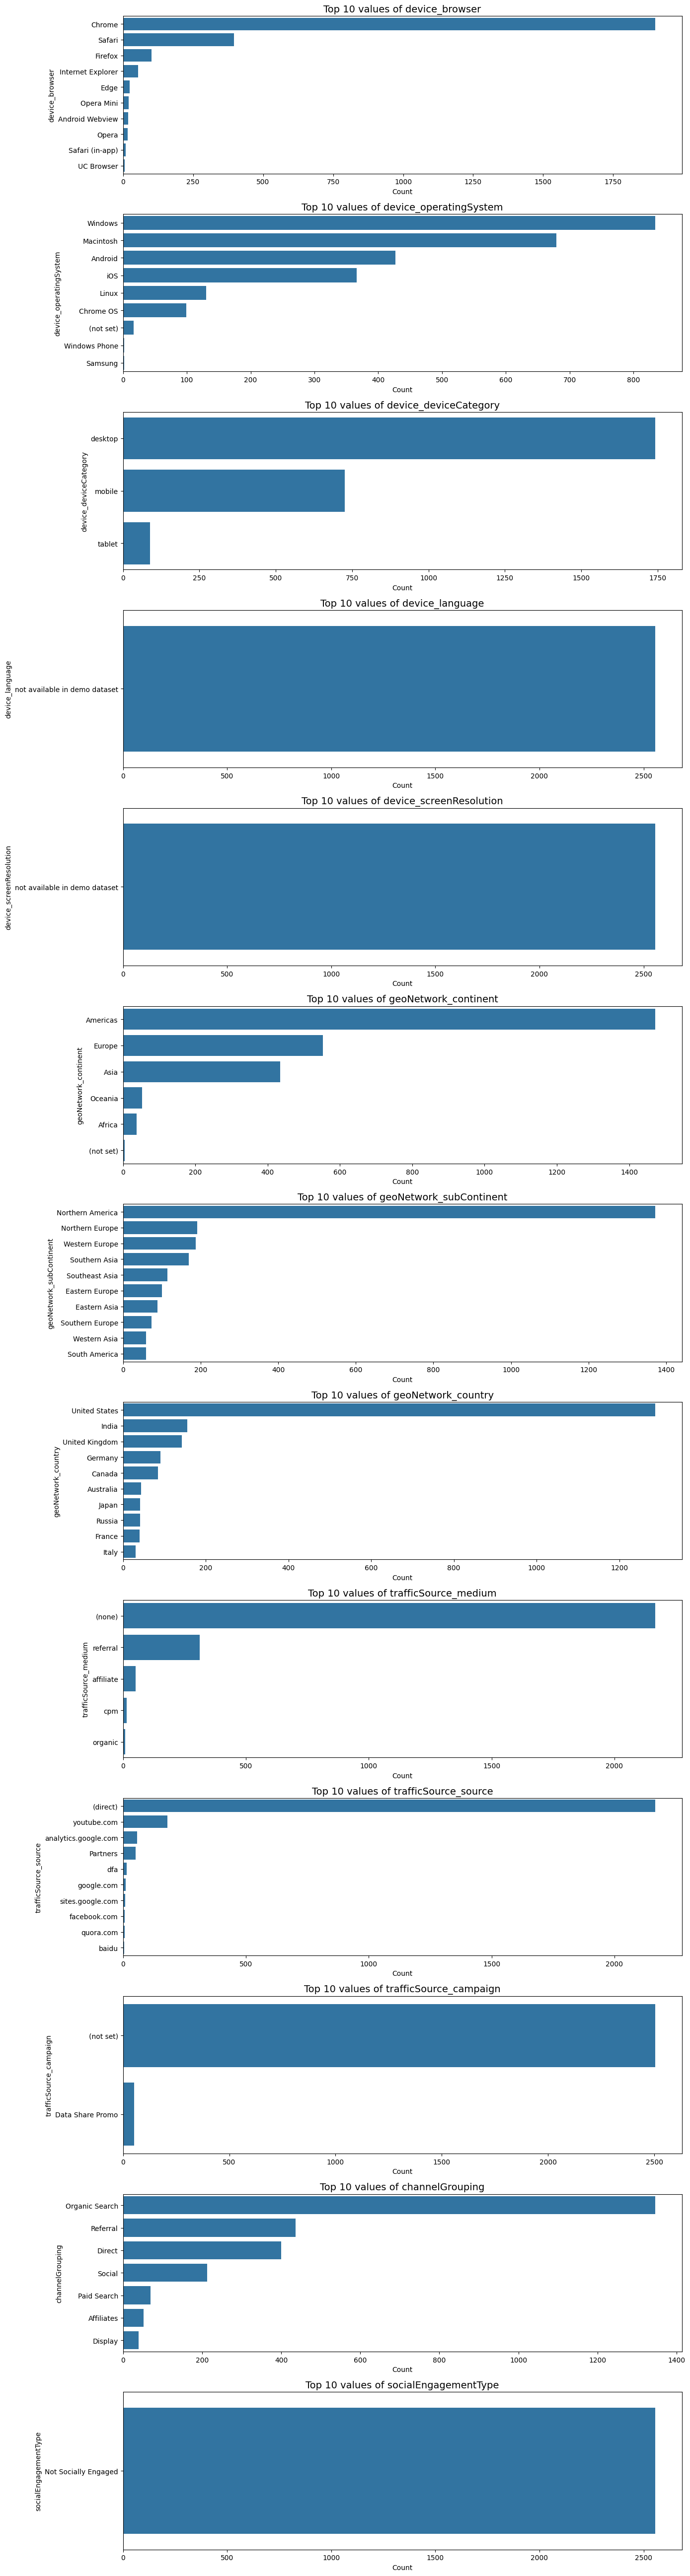

In [16]:

cat_cols = [
    "device_browser", "device_operatingSystem", "device_deviceCategory", 
    "device_language", "device_screenResolution",
    "geoNetwork_continent", "geoNetwork_subContinent", "geoNetwork_country", 
    "trafficSource_medium", "trafficSource_source", "trafficSource_campaign",
    "channelGrouping", "socialEngagementType"
]

fig, axes = plt.subplots(len(cat_cols), 1, figsize=(14, 4 * len(cat_cols)))

for i, col in enumerate(cat_cols):
    top_vals = df[col].value_counts().head(10)  # top 10 categories only
    sns.barplot(x=top_vals.values, y=top_vals.index, ax=axes[i])
    axes[i].set_title(f"Top 10 values of {col}", fontsize=14)
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


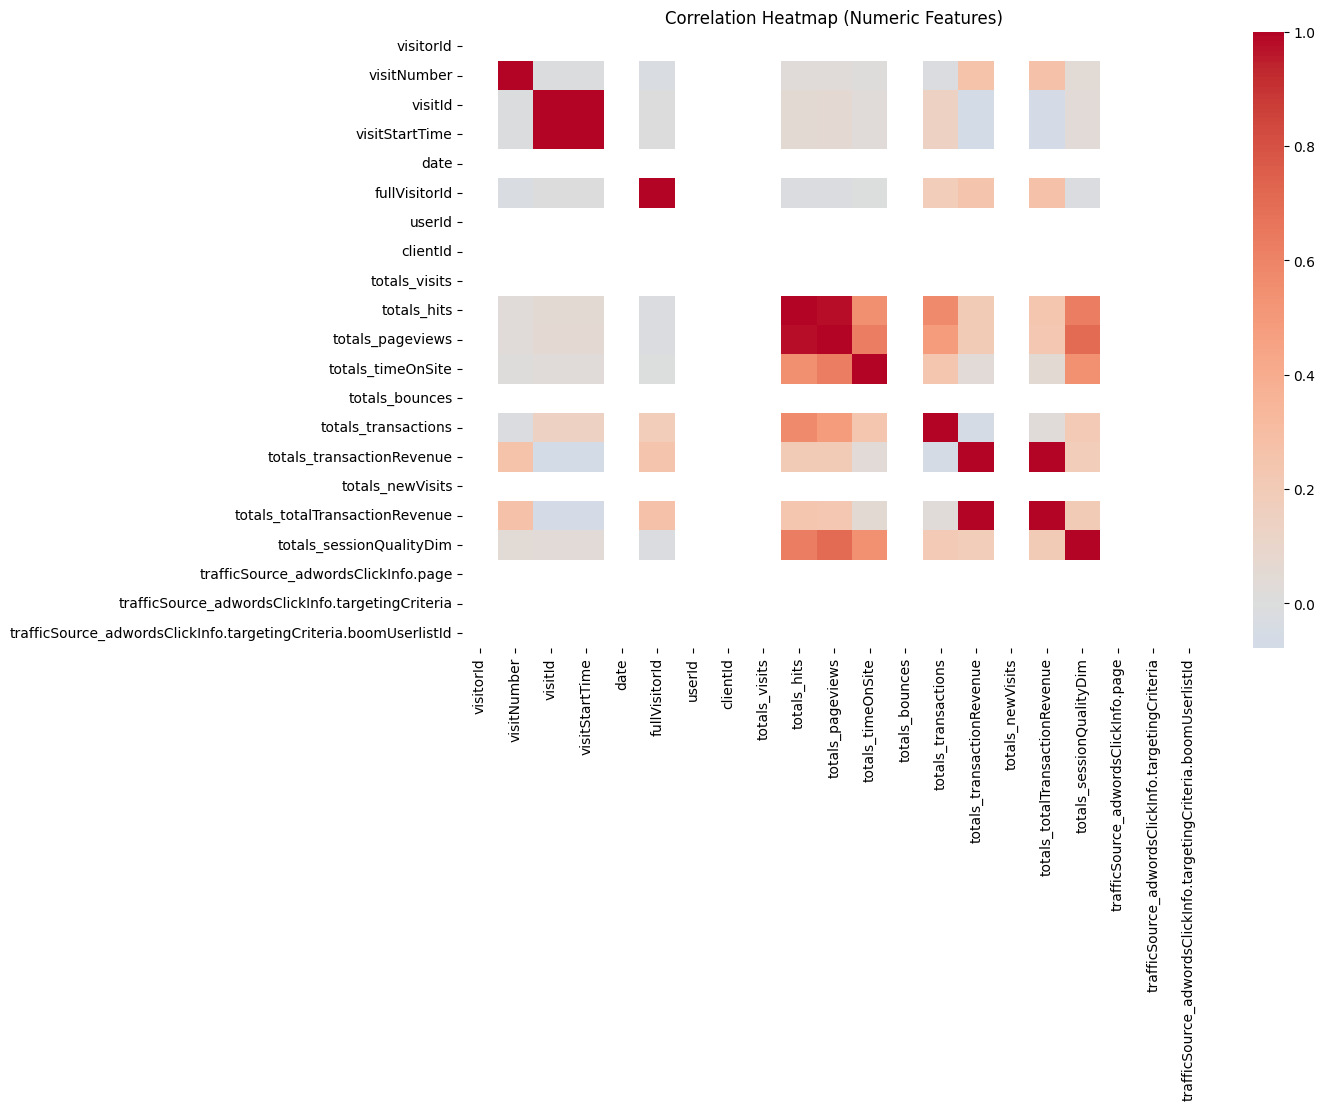

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [27]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")


In [32]:
print(df["date"].head())
print(df["date"].dtype)
print(df["date"].isna().sum())  # make sure no NaT


0   2017-08-01
1   2017-08-01
2   2017-08-01
3   2017-08-01
4   2017-08-01
Name: date, dtype: datetime64[ns]
datetime64[ns]
0


In [33]:
print(df["totals_hits"].head(10))
print(df["totals_hits"].dtype)
print(df["totals_hits"].isna().sum())
print(df["totals_hits"].sum())  # should be > 0


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: totals_hits, dtype: int64
int64
0
13233


In [35]:
import os

raw_dir = "../data/expanded"
os.makedirs(raw_dir, exist_ok=True)

print(f"Directory ready: {raw_dir}")

# Define full file path
raw_path = os.path.join(raw_dir, "expanded_ga_sessions.csv")

# Save DataFrame
df.to_csv(raw_path, index=False)

print(f" Raw data saved at: {raw_path}")

Directory ready: ../data/expanded
 Raw data saved at: ../data/expanded/expanded_ga_sessions.csv
